## customer segmentation
+ The goal is to segment the customer base to assist in targeted marketing efforts and gain insights into their buying habits.

### import packages 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3 as db

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

### import data

In [5]:
df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

### EDA

In [7]:
df.head()

Customers.id Customers.fname Customers.lname Customers.company  \
0           797         Christy            Dill          Company0   
1             3            John           Smith          Company1   
2             3            John           Smith          Company1   
3             4           James        Anderson               NaN   
4             5         Abraham          Pollak          Company3   

   Customers.create_date  Customers.status  Customers.mailing  \
0             1426018724               NaN                NaN   
1             1386089139               NaN                NaN   
2             1386089139               NaN                NaN   
3             1386780263               NaN                NaN   
4             1386861599               0.0                0.0   

   Customers.reminders  Customers.tax_exempt  Customers.account_id  \
0                  NaN                   NaN                   NaN   
1                  NaN                   NaN                   NaN   
2                  NaN                   NaN                   NaN   
3                  NaN                   NaN                   NaN   
4                  NaN                   NaN                   NaN   

   Customers.sales_rep  Customers.rewards  Customers.profile_id  \
0                  NaN                NaN                   NaN   
1                  NaN                NaN                   NaN   
2                  NaN                NaN                   NaN   
3                  NaN                NaN                   NaN   
4                  NaN                NaN                   NaN   

   Customers.last_modified  Customers.customer_type  Orders.id  \
0               1437764306                      0.0       3758   
1               1437764354                      0.0         23   
2               1437764354                      0.0       9531   
3               1437762646                      0.0         29   
4               1437764316                      0.0         30   

   Orders.customer_id Orders.fname Orders.lname Orders.company  \
0                 797      Christy         Dill       Company0   
1                   3         John        Smith       Company1   
2                   3         John        Smith       Company1   
3                   4        James     Anderson            NaN   
4                   5      Abraham       Pollak       Company3   

  Orders.order_number  Orders.reorder_id Orders.external_source  \
0                3758                NaN                    NaN   
1                  23                NaN                    NaN   
2                9531                NaN                    NaN   
3                  29                NaN                   Ebay   
4                  30                NaN                    NaN   

   Orders.external_id Orders.currency  Orders.sales_rep  Orders.subtotal  \
0                 NaN             USD               NaN            57.20   
1                 NaN             USD               NaN            20.00   
2                 NaN             USD               NaN            68.78   
3                 NaN             USD               NaN            19.56   
4                 NaN             USD               NaN            36.05   

   Orders.tax  Orders.shipping  Orders.coupon_id  Orders.coupon_amount  \
0         0.0             9.95              13.0                  2.86   
1         NaN             9.99               NaN                   NaN   
2         0.0             9.95               NaN                   NaN   
3         0.0             9.95               NaN                   NaN   
4         NaN             9.95               NaN                   NaN   

   Orders.gift_id  Orders.gift_amount Orders.fee_name  Orders.fee_amount  \
0             NaN                 NaN             NaN                NaN   
1             NaN                 NaN             NaN                NaN   
2             NaN                 NaN         

In [8]:
df.shape

(4194, 181)

In [9]:
df.isnull().sum()

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.customer_id                   0
Orders.fname                         0
Orders.lname                         0
Orders.company                    3466
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep         

In [10]:
counts_ = df.isnull().sum()
counts_drop = counts_[counts_ > 2500].index
df= df.drop(columns=counts_drop)

In [11]:
df.shape

(4194, 88)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 88 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.create_date          4194 non-null   int64  
 4   Customers.mailing              2114 non-null   float64
 5   Customers.last_modified        4194 non-null   int64  
 6   Customers.customer_type        3771 non-null   float64
 7   Orders.id                      4194 non-null   int64  
 8   Orders.customer_id             4194 non-null   int64  
 9   Orders.fname                   4194 non-null   object 
 10  Orders.lname                   4194 non-null   object 
 11  Orders.order_number            4194 non-null   object 
 12  Orders.currency                4194 non-null   o

In [13]:
customers = df[["Customers.id", "Customers.create_date", "Customers.last_modified","Customers.customer_type"]]
orders = df[[ "Orders.status", "Orders.total",     "Orders.payment_status", "Orders.payment_date", "Orders.payment_amount","Orders.subtotal"]]
products = df[["Products.id", "Products.list_price", "Products.price", "Products.cost",   "Products.status"]]

### imputation 

In [28]:
customers.isnull().sum()

Customers.id               0
Customers.create_date      0
Customers.last_modified    0
Customers.customer_type    0
dtype: int64

In [30]:
mean_value = customers['Customers.customer_type'].mean()
customers['Customers.customer_type'].fillna(mean_value, inplace=True)

In [32]:
orders.isnull().sum()

Orders.status             0
Orders.total              0
Orders.payment_status     5
Orders.payment_date      18
Orders.payment_amount    18
dtype: int64

In [34]:
mean_value = orders["Orders.payment_date"].mean()
orders["Orders.payment_date"].fillna(mean_value, inplace=True)

In [36]:
orders["Orders.payment_status"]= orders["Orders.payment_status"].fillna(3.0)

In [38]:
mean_value = orders["Orders.payment_amount"].mean()
orders["Orders.payment_amount"].fillna(mean_value, inplace=True)

In [47]:
products.isnull().sum()

Products.id            0
Products.list_price    0
Products.price         0
Products.cost          0
Products.status        0
dtype: int64

In [42]:
lr= LinearRegression()
imp= IterativeImputer(estimator=lr)
products= imp.fit_transform(products)

In [49]:
products= pd.DataFrame(products)
products.columns= ["Products.id", "Products.list_price", "Products.price", "Products.cost", "Products.status"]

###  create sqlite3 database

In [52]:
df1= pd.DataFrame(products)
conn= db.connect("product.db")
df1.to_sql("products",conn, index= False, if_exists= "replace")
conn.close()

In [54]:
df1= pd.DataFrame(customers)
conn= db.connect("customers.db")
df1.to_sql("customers",conn, index= False, if_exists= "replace")
conn.close()

In [56]:
df1= pd.DataFrame(orders)
conn= db.connect("orders.db")
df1.to_sql("orders",conn, index= False, if_exists= "replace")
conn.close()

In [58]:
df2= pd.concat([customers,products,orders],axis=1)

In [60]:
df2

Customers.id  Customers.create_date  Customers.last_modified  \
0              797             1426018724               1437764306   
1                3             1386089139               1437764354   
2                3             1386089139               1437764354   
3                4             1386780263               1437762646   
4                5             1386861599               1437764316   
5                5             1386861599               1437764316   
6                5             1386861599               1437764316   
7                7             1388155947               1437763617   
8                8             1389303216               1437763421   
9               10             1390509516               1437763553   
10              11             1390573155               1437763644   
11              12             1390613314               1437762807   
12              13             1390856039               1437763265   
13              13             1390856039               1437763265   
14              13             1390856039               1437763265   
15              14             1391012017               1437762774   
16              15             1391362873               1437763316   
17              66             1395348641               1437763333   
18              21             1391618732               1437762877   
19              22             1391814966               1437763278   
20              23             1391896746               1437763710   
21              23             1391896746               1437763710   
22              23             1391896746               1437763710   
23              23             1391896746               1437763710   
24              24             1392048474               1437762652   
25              25             1392048647               1437762986   
26              26             1392053937               1437763531   
27              27             1392133600               1437763518   
28              27             1392133600               1437763518   
29              27             1392133600               1437763518   
30              27             1392133600               1437763518   
31              27             1392133600               1437763518   
32              27             1392133600               1437763518   
33              27             1392133600               1437763518   
34              65             1395336674               1437763013   
35              65             1395336674               1437763013   
36              65             1395336674               1437763013   
37              30             1392311828               1437763560   
38              31             1392391683               1437764336   
39              32             1392394110               1437763266   
40              33             1392484955               1437763230   
41              35             1393012093               1437764293   
42              37             1393202855               1437763100   
43              39             1393370003               1437763022   
44              40             1393524073               1437763489   
45              41             1393534046               1437764242   
46              41             1393534046               1437764242   
47              42             1393680949               1437763057   
48              43             1393711682               1437763628   
49              44             1393862428               1437762859   
50              45             1393966742               1437764308   
51              45             1393966742               1437764308   
52              45             1393966742               1437764308   
53              45             1393966742               1437764308   
54              45             1393966742               1437764308   
55              45             1393966742               1437764308   
56              

In [61]:
df2= pd.get_dummies(df2)


In [62]:
print(df2.dtypes)

Customers.id                 int64
Customers.create_date        int64
Customers.last_modified      int64
Customers.customer_type    float64
Products.id                float64
Products.list_price        float64
Products.price             float64
Products.cost              float64
Products.status            float64
Orders.status                int64
Orders.total               float64
Orders.payment_status      float64
Orders.payment_date        float64
Orders.payment_amount      float64
dtype: object


In [63]:
from sklearn.preprocessing import LabelEncoder
# Kategorik değişkenleri belirleyelim
categorical_columns = ['Customers.customer_type', 'Products.status', 'Orders.payment_status']

# Label Encoding uygulayalım
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Float olan sütunları sayısal formata çevirelim
df = df.apply(pd.to_numeric, errors='coerce')


In [68]:
print(df2.dtypes)

Customers.id                 int64
Customers.create_date        int64
Customers.last_modified      int64
Customers.customer_type    float64
Products.id                float64
Products.list_price        float64
Products.price             float64
Products.cost              float64
Products.status            float64
Orders.status                int64
Orders.total               float64
Orders.payment_status      float64
Orders.payment_date        float64
Orders.payment_amount      float64
dtype: object


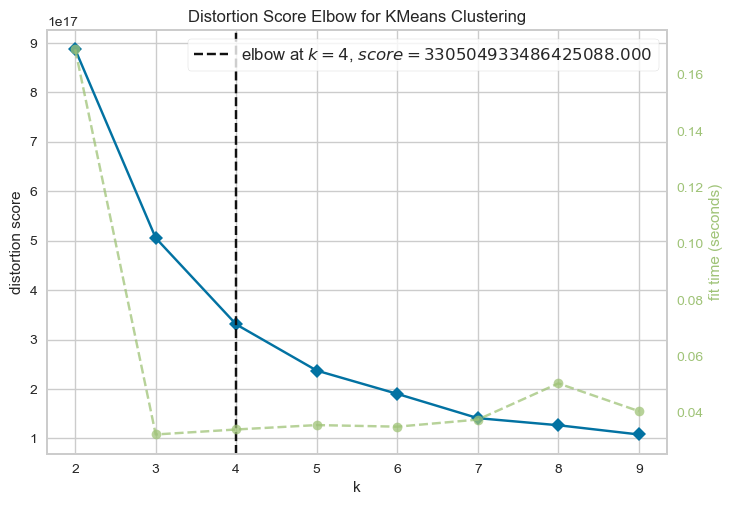

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
km= KMeans()
vis =KElbowVisualizer(km,k=(2,10))
vis.fit(df2)
vis.show()

In [74]:
model= KMeans(4)

In [76]:
model= model.fit(df2)

In [78]:
pred= model.predict(df2)

In [84]:
silhouette_score(df2,pred)

0.5334770591697116

In [86]:
df2["cluster"]= pred

In [88]:
df2["cluster"].value_counts()

cluster
1    1639
0    1047
3     958
2     550
Name: count, dtype: int64

In [90]:
df2

Customers.id  Customers.create_date  Customers.last_modified  \
0              797             1426018724               1437764306   
1                3             1386089139               1437764354   
2                3             1386089139               1437764354   
3                4             1386780263               1437762646   
4                5             1386861599               1437764316   
5                5             1386861599               1437764316   
6                5             1386861599               1437764316   
7                7             1388155947               1437763617   
8                8             1389303216               1437763421   
9               10             1390509516               1437763553   
10              11             1390573155               1437763644   
11              12             1390613314               1437762807   
12              13             1390856039               1437763265   
13              13             1390856039               1437763265   
14              13             1390856039               1437763265   
15              14             1391012017               1437762774   
16              15             1391362873               1437763316   
17              66             1395348641               1437763333   
18              21             1391618732               1437762877   
19              22             1391814966               1437763278   
20              23             1391896746               1437763710   
21              23             1391896746               1437763710   
22              23             1391896746               1437763710   
23              23             1391896746               1437763710   
24              24             1392048474               1437762652   
25              25             1392048647               1437762986   
26              26             1392053937               1437763531   
27              27             1392133600               1437763518   
28              27             1392133600               1437763518   
29              27             1392133600               1437763518   
30              27             1392133600               1437763518   
31              27             1392133600               1437763518   
32              27             1392133600               1437763518   
33              27             1392133600               1437763518   
34              65             1395336674               1437763013   
35              65             1395336674               1437763013   
36              65             1395336674               1437763013   
37              30             1392311828               1437763560   
38              31             1392391683               1437764336   
39              32             1392394110               1437763266   
40              33             1392484955               1437763230   
41              35             1393012093               1437764293   
42              37             1393202855               1437763100   
43              39             1393370003               1437763022   
44              40             1393524073               1437763489   
45              41             1393534046               1437764242   
46              41             1393534046               1437764242   
47              42             1393680949               1437763057   
48              43             1393711682               1437763628   
49              44             1393862428               1437762859   
50              45             1393966742               1437764308   
51              45             1393966742               1437764308   
52              45             1393966742               1437764308   
53              45             1393966742               1437764308   
54              45             1393966742               1437764308   
55              45             1393966742               1437764308   
56              

In [94]:
df2["customerID"]= df2["Customers.id"]

In [96]:
df2["customerID"].value_counts()

customerID
1043    41
1371    35
1616    27
581     25
515     25
851     23
396     18
1018    17
1420    17
403     15
583     13
1794    12
304     12
1776    12
973     11
1730    11
3399    10
45      10
1352    10
412      9
242      9
2429     9
213      9
1210     8
2722     8
3232     8
1741     8
306      7
55       7
885      7
27       7
1038     6
2272     6
451      6
333      6
2038     6
3480     6
695      6
985      6
1289     6
2710     6
978      6
2820     6
2133     5
3386     5
876      5
1034     5
753      5
1996     5
1991     5
3337     5
1131     5
630      5
845      5
3564     5
79       5
699      5
104      5
1533     5
1805     5
792      5
428      5
2651     5
2611     5
2269     5
1094     5
2404     5
539      5
1097     4
1105     4
765      4
294      4
1385     4
976      4
1761     4
2108     4
1027     4
23       4
2920     4
2839     4
2767     4
550      4
866      4
702      4
2676     4
2540     4
2841     4
2479     4
1595     4
3618     4

In [100]:
df2["Orders.payment_date"] = pd.to_datetime(df2["Orders.payment_date"], unit ="s")
# saniyeyi normal tarihe çevirdik

In [108]:
# RFM analizi
now= pd.to_datetime("2024-10-09")
recency = df2.groupby("customerID")["Orders.payment_date"].max()  # Her müşteri için en son ödeme tarihini bul
recency = (now - recency).dt.days  # Son ödeme tarihinden bugünün tarihini çıkar
frequency = df2.groupby("customerID")["Orders.payment_date"].count()  # Her müşteri için toplam alışveriş sayısını bul
monetary = df2.groupby("customerID")["Orders.total"].sum()  # Her müşteri için toplam harcama miktarını hesapla

+ Recency (Son Alım Zamanı): Müşterinin en son ne zaman alışveriş yaptığıdır. Daha yakın tarihlerde alışveriş yapan müşteriler, daha önce alışveriş yapanlara göre daha değerlidir. Bu, müşteri bağlılığının bir göstergesi olarak kabul edilir.

+ Frequency (Alım Sıklığı): Belirli bir zaman diliminde (örneğin, son bir yıl içinde) müşterinin kaç kez alışveriş yaptığıdır. Daha sık alışveriş yapan müşteriler, markaya olan bağlılıklarını ve memnuniyetlerini gösterir.

+ Monetary (Harcamalar): Müşterinin belirli bir zaman diliminde (örneğin, son bir yıl içinde) ne kadar harcama yaptığıdır. Daha yüksek harcamalar, müşterinin değerini ve markaya olan bağlılığını gösterir.

In [111]:
# RFM DataFrame oluşturma
rfm = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
}).reset_index()

In [113]:
rfm

customerID  Recency  Frequency  Monetary
0              3     3227          2    108.72
1              4     3954          1     29.55
2              5     3302          3    124.99
3              7     3938          1     49.14
4              8     3921          1     69.70
5             10     3911          1     34.00
6             11     3856          1     34.00
7             12     3909          1     31.47
8             13     3521          3    322.93
9             14     3905          1    349.98
10            15     3901          1     28.89
11            21     3898          1     34.00
12            22     3896          1     23.63
13            23     3562          4    363.34
14            24     3893          1     39.33
15            25     3893          1     35.00
16            26     3302          1     35.00
17            27     3752          7    128.73
18            30     3890          1     35.00
19            31     3889          1    170.34
20            32     3889          1     43.20
21            33     3888          1     14.83
22            35     3882          1     27.17
23            37     3879          1    116.13
24            39     3878          1     28.95
25            40     3876          1    154.70
26            41     3876          2    205.82
27            42     3874          1     32.09
28            43     3874          1     49.14
29            44     3872          1     39.95
30            45     3821         10   1361.15
31            46     3871          1     14.83
32            48     3859          1    102.75
33            50     3869          1    118.98
34            52     3867          1     63.67
35            55     3396          7   1972.18
36            56     3864          1    213.29
37            57     3862          1    140.28
38            59     3861          1     27.41
39            60     3861          1    102.77
40            61     3858          1     47.33
41            62     3858          1     39.95
42            63     3857          1     68.89
43            65     3855          3    164.73
44            66     3855          1    119.70
45            68     3854          1    210.01
46            69     3854          1     59.49
47            70     3850          1    265.26
48            71     3853          1     44.66
49            72     3852          1     35.00
50            73     3208          3    124.39
51            74     3851          1    129.65
52            75     3850          1     52.67
53            76     3850          1     33.88
54            77     3850          1     94.28
55            78     3849          1     86.31
56            79     3243          5    343.78
57            82     3847          1    119.70
58            84     3302          1     92.02
59            85     3842          3    312.48
60           100     3395          3   2784.82
61           101     3802          2     56.72
62           102     3841          1     98.63
63           103     3841          1     41.55
64           104     3726          5    208.96
65           105     3840          1     37.53
66           106     3839          1     50.55
67           112     3831          1     44.22
68           113     3828          1     88.17
69           114     3302          1    154.65
70           115     3820          1     47.49
71           116     3816          1     33.99
72           117     3815          1     33.99
73           118     3814          1     32.99
74           120     3812          1     86.99
75           121     3812          1     32.99
76           122     3809          1     61.29
77           123     3809          1    129.99
78           124     3809          1     88.91
79           125     3807          1     32.10
80           128     3803          1     33.99
81           129     3803          1    129.99
82           130     3802          1    129.99
83           131     3802          1     33.99
84         